<a href="https://colab.research.google.com/github/AyeCharm7/MMDT_2025_MLAI101/blob/AyeCharm/Regression/Lab1_grad_des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

df=pd.read_csv('/content/Advertising.csv', index_col = 0)
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [2]:
sel_program = 'radio'
X=df[[sel_program]]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
#X = np.array((X-X.mean())/X.std())

X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [3]:
def initialize(dim):
    b=random.random()
    a=np.random.rand(dim)
    return b,a

In [4]:
def predict_Y(b,a,X):
    return b + np.dot(X,a)

In [5]:
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y)

In [6]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

In [7]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    tolerance = 1e-06
    b,theta=initialize(X.shape[1])

    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', 'value_weight', 'cost'])
    result_idx=0
    prev_cost =0

    for iter_num in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        gd_iterations_df.loc[result_idx]=[iter_num,b, theta[0], this_cost]
        result_idx=result_idx+1
        if (np.abs(this_cost  - prev_cost )<= tolerance):
            break
        prev_cost = this_cost
    return gd_iterations_df,b,theta

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)

print(gd_iterations_df)

     iteration   value_b  value_weight      cost
0          0.0  0.906297      0.648244  1.525242
1          1.0  0.888171      0.646811  1.491162
2          2.0  0.870407      0.645407  1.458433
3          3.0  0.852999      0.644030  1.426999
4          4.0  0.835939      0.642680  1.396810
..         ...       ...           ...       ...
256      256.0  0.005142      0.576642  0.664655
257      257.0  0.005039      0.576634  0.664654
258      258.0  0.004939      0.576626  0.664653
259      259.0  0.004840      0.576617  0.664652
260      260.0  0.004743      0.576610  0.664651

[261 rows x 4 columns]


In [8]:
#sns.scatterplot(data=gd_iterations_df, x="value_weight", y="cost")

In [9]:
idx = gd_iterations_df['cost'].argmin()
best_parameters = gd_iterations_df.loc[idx, ['value_b', 'value_weight']]
best_parameters['value_weight']


np.float64(0.5766096233376011)

In [10]:
x = df[sel_program]
y_ini = gd_iterations_df.loc[0, 'value_b'] + gd_iterations_df.loc[0, 'value_weight']*x
y_hat = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*x

In [11]:
import numpy as np

y_p = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*X
error = np.sum(np.abs(Y- y_p[sel_program]))/len(Y)
print(sel_program, error, get_cost(Y, y_p[sel_program]))

np.sum(((np.abs(Y- y_p[sel_program]))>0.5))


radio 0.6357483170100005 0.6646503516139798


np.int64(100)

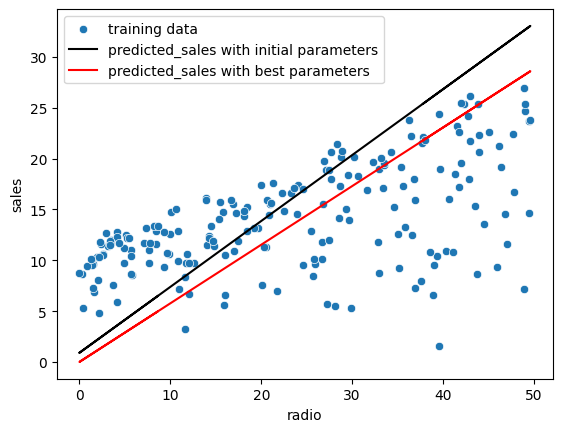

In [12]:
sns.scatterplot(data=df, x=sel_program, y="sales")
plt.plot( x,  y_ini, 'k', x, y_hat, 'r')
plt.legend(['training data', 'predicted_sales with initial parameters',
            'predicted_sales with best parameters'])
plt.show()